# Summary stats

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
metadata_csv = "../gc_metadata.csv"
cell_table_csv = "../nextflow/results/observed-seqs.csv"
outbase = "output/cell-summaries/"

In [3]:
output_dir = f"{outbase}"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [4]:
metadata = pd.read_csv(metadata_csv, index_col=0).query("cell_type == 'GC' and strain == 'wt'")
metadata

,ngs_id,imm_duration,mouse,gc,strain,node,cell_type,plate,hc_barcode,lc_barcode,row,col
uid,,,,,,,,,,,,
D15_M1_GC1,PR-2-01,d15,1,1,wt,RP,GC,2,9,9,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D15_M1_GC2,PR-2-01,d15,1,2,wt,RI,GC,3,2,1,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D15_M1_GC3,PR-2-01,d15,1,3,wt,LI,GC,4,14,2,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D15_M2_GC4,PR-2-01,d15,2,4,wt,RP,GC,5,10,11,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D15_M3_GC5,PR-2-01,d15,3,5,wt,RP,GC,6,7,4,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
...,...,...,...,...,...,...,...,...,...,...,...,...
D20_M24_GC115,PR-1-04,d20,24,115,wt,RP,GC,72,16,16,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D20_M25_GC116,PR-1-02,d20,25,116,wt,RP,GC,65,8,8,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D20_M25_GC117,PR-1-03,d20,25,117,wt,RP,GC,68,9,9,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12


## Cell-wise stats

In [5]:
cell_table = pd.read_csv(cell_table_csv).query("uid in @metadata.index")
cell_table.to_csv(f"{output_dir}/cell_table.csv", index=False)
cell_table

,ID_HK,well,uid,ngs_id,mouse,gc,node,cell_type,imm_duration,aa_substitutions_IMGT,...,fasta_header_HC,fasta_header_LC,fasta_seq_HC,fasta_seq_LC,partis_sequence_HC,partis_sequence_LC,seq_aa_HC,seq_aa_LC,seq_nt_HC,seq_nt_LC
315,230512P10A01HK,A01,D15_M2_GC4,PR-2-01,2,4,RP,GC,d15,Y42(L)C,...,PR-2-01.230512.P10.A01.H.R.1-26,PR-2-01.230512.P11.A01.K.R.1-261,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWCQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
316,230512P10A02HK,A02,D15_M2_GC4,PR-2-01,2,4,RP,GC,d15,E6(H)A G63(H)D K72(H)E A105(H)V S79(L)R,...,PR-2-01.230512.P10.A02.H.R.1-257,PR-2-01.230512.P11.A02.K.R.1-300,GAGGTGCAGCTTCAGGCGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGCGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQASGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggcgtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
317,230512P10A03HK,A03,D15_M2_GC4,PR-2-01,2,4,RP,GC,d15,S64(H)N T79(H)I A105(H)G,...,PR-2-01.230512.P10.A03.H.R.1-58,PR-2-01.230512.P11.A03.K.R.1-284,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
318,230512P10A04HK,A04,D15_M2_GC4,PR-2-01,2,4,RP,GC,d15,K49(H)Q Y42(L)C,...,PR-2-01.230512.P10.A04.H.R.1-70,PR-2-01.230512.P11.A04.K.R.1-226,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNQLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWCQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
319,230512P10A05HK,A05,D15_M2_GC4,PR-2-01,2,4,RP,GC,d15,E6(H)A I56(H)M A105(H)T Q27(L)H,...,PR-2-01.230512.P10.A05.H.R.1-185,PR-2-01.230512.P11.A05.K.R.1-253,GAGGTGCAGCTTCAGGCGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGCGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQASGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASHNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggcgtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,240429P10H06HK,H06,D15_M13_GC31,PR-2-03,13,31,LI,GC,d15,I78(H)F Y42(L)S N108(L)K K123(L)E,...,PR-2-03.240429.P10.H06.H.R.1-50,PR-2-03.240429.P10.H06.K.R.1-840,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWSQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
10425,240429P10H07HK,H07,D15_M13_GC31,PR-2-03,13,31,LI,GC,d15,T79(H)I T101(H)S Q105(L)H,...,PR-2-03.240429.P10.H07.H.R.1-87,PR-2-03.240429.P10.H07.K.R.1-186,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSL

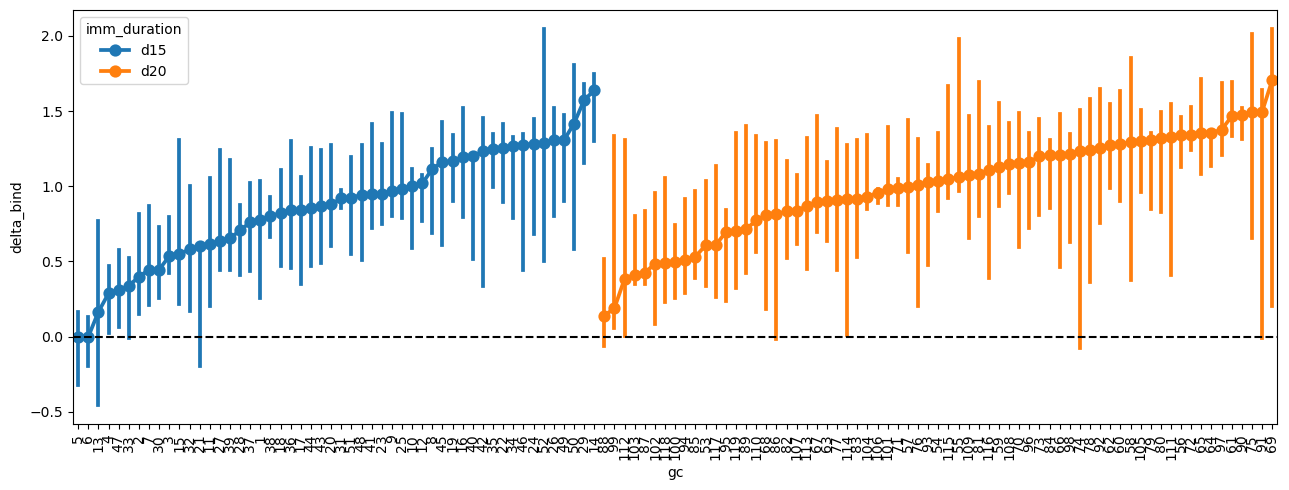

In [6]:
plt.figure(figsize=(13, 5))
sns.pointplot(
    data=cell_table,
    hue="imm_duration",
    x="gc", order=cell_table.groupby("gc").agg(dict(imm_duration="first", delta_bind="median")).sort_values(["imm_duration", "delta_bind"]).index,
    y="delta_bind",
    estimator="median",
    errorbar=("pi", 50),
    )
plt.axhline(0, color="black", linestyle="--")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"{output_dir}/delta_bind.pdf")
plt.show()

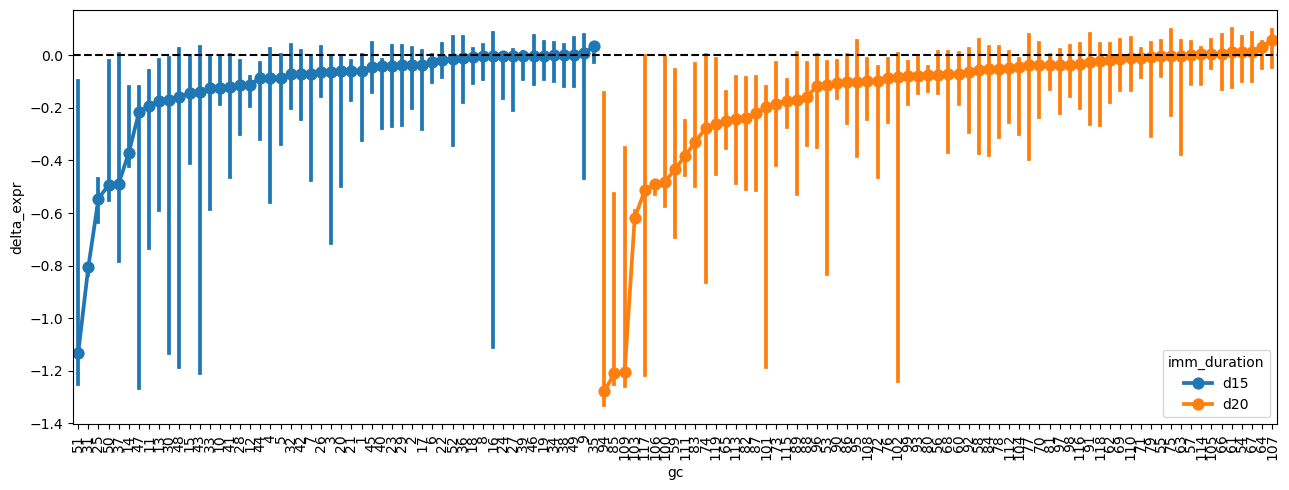

In [7]:
plt.figure(figsize=(13, 5))
sns.pointplot(
    data=cell_table,
    hue="imm_duration",
    x="gc", order=cell_table.groupby("gc").agg(dict(imm_duration="first", delta_expr="median")).sort_values(["imm_duration", "delta_expr"]).index,
    y="delta_expr",
    estimator="median",
    errorbar=("pi", 50),
    )
plt.axhline(0, color="black", linestyle="--")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"{output_dir}/delta_expr.pdf")
plt.show()

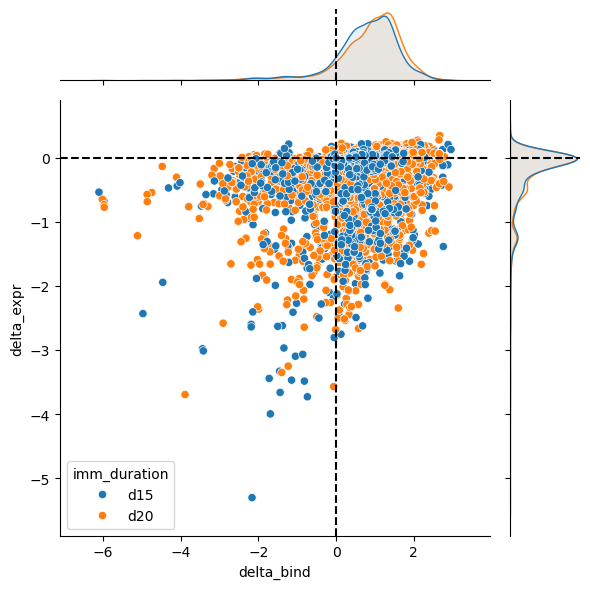

In [8]:

g = sns.JointGrid(data=cell_table, x="delta_bind", y="delta_expr", hue="imm_duration")
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot, common_norm=False, fill=True, alpha=0.1)
g.ax_joint.axvline(0, color="black", linestyle="--")
g.ax_joint.axhline(0, color="black", linestyle="--")
g.ax_marg_x.axvline(0, color="black", linestyle="--")
g.ax_marg_y.axhline(0, color="black", linestyle="--")
plt.tight_layout()
plt.savefig(f"{output_dir}/joint_cells.pdf")
plt.show()

## GC-wise stats

In [9]:
gc_summary = cell_table.groupby("gc").agg(
    median_delta_bind=pd.NamedAgg(column="delta_bind", aggfunc="median"),
    median_delta_expr=pd.NamedAgg(column="delta_expr", aggfunc="median"),
    sampling_time=pd.NamedAgg(column="imm_duration", aggfunc="first"),
    n_cells=pd.NamedAgg(column="uid", aggfunc="count")
)

gc_summary.to_csv(f"{output_dir}/gc_summary.csv")
gc_summary

,median_delta_bind,median_delta_expr,sampling_time,n_cells
gc,,,,
1,0.773400,-0.05788,d15,67
2,0.397360,-0.03688,d15,79
3,0.535100,-0.06153,d15,73
4,0.287630,-0.08646,d15,44
5,0.000000,-0.08452,d15,78
...,...,...,...,...
115,1.046480,-0.17240,d20,85
116,1.105020,-0.03121,d20,78
117,0.608315,-0.51338,d20,76


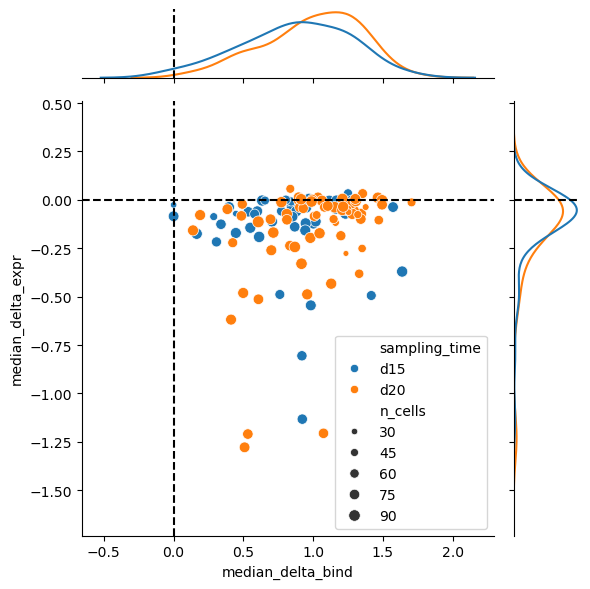

In [10]:
g = sns.JointGrid(data=gc_summary, x="median_delta_bind", y="median_delta_expr", hue="sampling_time")
g.plot_joint(sns.scatterplot, size=gc_summary.n_cells)
g.plot_marginals(sns.kdeplot, common_norm=False)
g.ax_joint.axvline(0, color="black", linestyle="--")
g.ax_joint.axhline(0, color="black", linestyle="--")
g.ax_marg_x.axvline(0, color="black", linestyle="--")
g.ax_marg_y.axhline(0, color="black", linestyle="--")
plt.tight_layout()
plt.savefig(f"{output_dir}/joint_gc_medians.pdf")
plt.show()

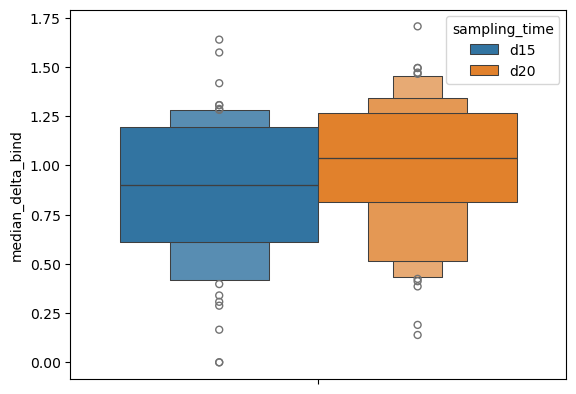

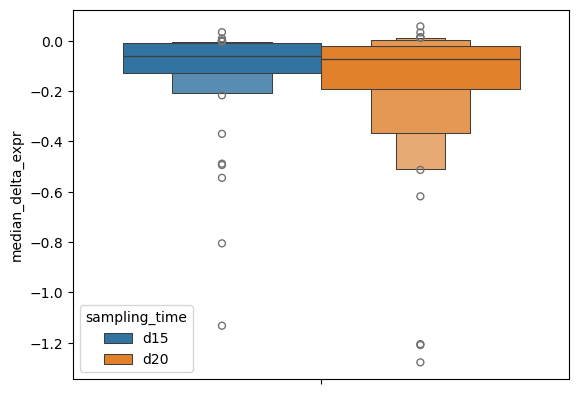

In [11]:
sns.boxenplot(data=gc_summary, y="median_delta_bind", hue="sampling_time")
plt.show()
sns.boxenplot(data=gc_summary, y="median_delta_expr", hue="sampling_time")
plt.show()